In [17]:
import os
import pandas as pd
import matplotlib as mlt
from pathlib import Path
import scipy.stats as st
import matplotlib.pyplot as plt

In [7]:
 #designate the csv file data path
data_load = Path ('../Resources/wine_data.csv')

# uniform language
wine_df = pd.read_csv(data_load,encoding="ISO-8859-1")

# removing duplicates
wine_df = wine_df.drop(["Unnamed: 7", "Unnamed: 8", "Unnamed: 9", "Unnamed: 10", "Unnamed: 11", "Unnamed: 12"], axis=1)
wine_df = wine_df.drop_duplicates()

# rennaming and capitalization of data
wine_df.rename(columns={'country':'Country'}, inplace=True)
wine_df.rename(columns={'description':'Description'}, inplace=True)
wine_df.rename(columns={'points':'Points'}, inplace=True)
wine_df.rename(columns={'price ($)':'Price ($)'}, inplace=True)
wine_df.rename(columns={'region':'Region'}, inplace=True)
wine_df.rename(columns={'title':'Title'}, inplace=True)
wine_df.rename(columns={'variety':'Variety'}, inplace=True)

#change types from objects to strings, anything that is a number to a float64/int
wine_df['Country']= wine_df['Country'].astype('string')
wine_df['Description']= wine_df['Description'].astype('string')
wine_df['Region']= wine_df['Region'].astype('string')
wine_df['Title']= wine_df['Title'].astype('string')
wine_df['Variety']= wine_df['Variety'].astype('string')
wine_df['Price ($)']=pd.to_numeric(wine_df['Price ($)'],errors='coerce')
wine_df['Points']=pd.to_numeric(wine_df['Points'],errors='coerce')

#drop unnecessary values
wine_df = wine_df.dropna(axis=0)

#print first five rows of data frame
wine_df.head()



C:\Users\caroj\AppData\Local\Temp\ipykernel_3928\2197072012.py:5: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  wine_df = pd.read_csv(data_load,encoding="ISO-8859-1")


,Country,Description,Points,Price ($),Region,Title,Variety
2,US,"Tart and snappy, the flavors of lime flesh and...",87.0,14.0,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris
3,US,"Pineapple rind, lemon pith and orange blossom ...",87.0,13.0,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling
4,US,"Much like the regular bottling from 2012, this...",87.0,65.0,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir
5,Spain,Blackberry and raspberry aromas show a typical...,87.0,15.0,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot
6,Italy,"Here's a bright, informal red that opens with ...",87.0,16.0,Vittoria,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato


In [8]:
# df types
wine_df.dtypes

Country        string[python]
Description    string[python]
Points                float64
Price ($)             float64
Region         string[python]
Title          string[python]
Variety        string[python]
dtype: object

In [9]:
# df count
wine_df.count()

Country        93576
Description    93576
Points         93576
Price ($)      93576
Region         93576
Title          93576
Variety        93576
dtype: int64

In [11]:
#find the different columns that are in data frame
wine_df.columns 

Index(['Country', 'Description', 'Points', 'Price ($)', 'Region', 'Title',
       'Variety'],
      dtype='object')

In [12]:
wine_df.groupby('Variety').count()['Country'].nlargest(n=10)

Variety
Pinot Noir                  10841
Chardonnay                   9293
Cabernet Sauvignon           7738
Red Blend                    6940
Bordeaux-style Red Blend     4754
Syrah                        3345
Sauvignon Blanc              2930
Rosé                         2557
Zinfandel                    2523
Merlot                       2450
Name: Country, dtype: int64

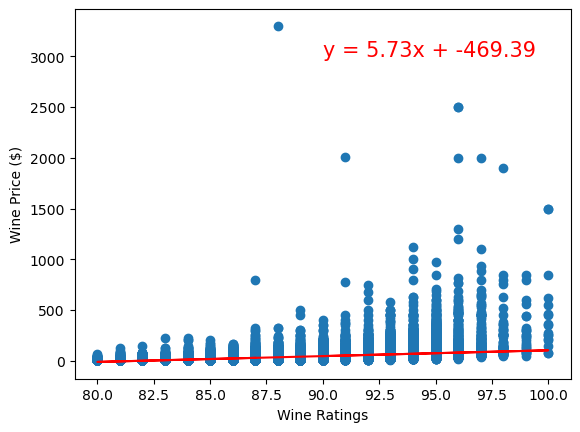

PearsonRResult(statistic=0.4149569124009651, pvalue=0.0)
5.726900070932408 -469.3927736293209 0.41495691240096577 0.0 0.04104918491942843


In [25]:
x_values = wine_df['Points']
y_values = wine_df['Price ($)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(90,3000),fontsize=15,color="red")
plt.xlabel('Wine Ratings')
plt.ylabel('Wine Price ($)')
plt.show()
print(correlation)
print(slope, intercept, rvalue, pvalue, stderr)

In [13]:
df= wine_df['Variety'].value_counts()
threshold = 2500
drop_df = df[df > threshold].index

clean_wine_df = wine_df[wine_df['Variety'].isin(drop_df)==False].reset_index(drop=True)

clean_wine_df.dtypes


Country        string[python]
Description    string[python]
Points                float64
Price ($)             float64
Region         string[python]
Title          string[python]
Variety        string[python]
dtype: object

In [29]:
high_points = clean_wine_df.loc[(clean_wine_df['Points']>= 90) & (clean_wine_df['Price ($)']<= 300)]

high_points[['Points', 'Price ($)']]

,Points,Price ($)
55,92.0,80.0
56,92.0,70.0
57,92.0,40.0
58,91.0,48.0
59,91.0,13.0
...,...,...
42650,90.0,40.0
42651,90.0,28.0
42652,90.0,30.0
42653,90.0,32.0


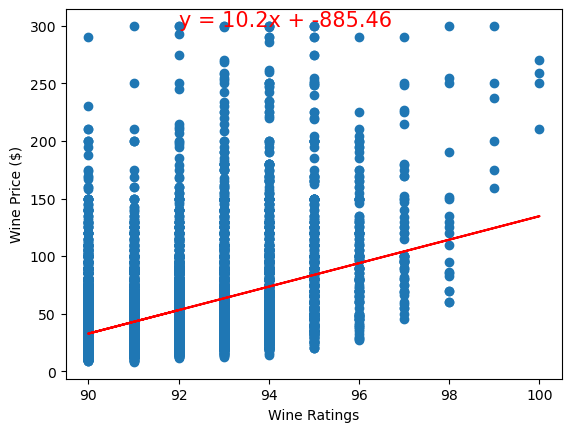

PearsonRResult(statistic=0.4531818720357277, pvalue=0.0)
10.200931588743279 -885.4595788748009 0.45318187203572713 0.0 0.16817831923055288


In [33]:
x_values = high_points['Points']
y_values = high_points['Price ($)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(92,300),fontsize=15,color="red")
plt.xlabel('Wine Ratings')
plt.ylabel('Wine Price ($)')
plt.show()
print(correlation)
print(slope, intercept, rvalue, pvalue, stderr)